In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [26]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [27]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [29]:
df.shape

(10000, 14)

In [30]:
df.duplicated().sum()

0

In [31]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [32]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [33]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [34]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [36]:
df = pd.get_dummies(df,columns=(['Geography','Gender']),drop_first=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.5 KB


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
X= df.drop(columns=['Exited'])
y=df['Exited']

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
X_test_scaled

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [43]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [58]:
model = Sequential()
model.add(Dense(3,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [62]:
history=model.fit(X_train_scaled,y_train,epochs=40,validation_split=0.2)

Epoch 1/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8189 - loss: 0.4091 - val_accuracy: 0.8344 - val_loss: 0.3937
Epoch 2/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8158 - loss: 0.4067 - val_accuracy: 0.8331 - val_loss: 0.3932
Epoch 3/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8164 - loss: 0.4070 - val_accuracy: 0.8319 - val_loss: 0.3927
Epoch 4/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8168 - loss: 0.4097 - val_accuracy: 0.8356 - val_loss: 0.3920
Epoch 5/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8257 - loss: 0.4017 - val_accuracy: 0.8363 - val_loss: 0.3915
Epoch 6/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8289 - loss: 0.3987 - val_accuracy: 0.8344 - val_loss: 0.3913
Epoch 7/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8285 - loss: 0.4100 - val_accuracy: 0.8350 - val_loss: 0.3906
Epoch 8/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8213 - loss: 0.4090 - val_accuracy: 0.

In [63]:
model.layers[0].get_weights()

[array([[ 1.12981554e-02,  7.30273053e-02,  1.71998367e-02],
        [-1.63589656e-01,  2.81515032e-01, -1.24214172e+00],
        [-3.38719948e-03,  1.13462023e-01, -5.67844436e-02],
        [ 5.35887659e-01,  1.08521909e-01,  1.24089025e-01],
        [ 1.99139035e+00,  3.78030419e-01,  7.22496808e-01],
        [-3.65599319e-02,  1.95448965e-01, -1.30592912e-01],
        [ 1.67053118e-01,  7.96876907e-01, -2.17638105e-01],
        [-4.97484133e-02, -5.10907732e-02,  1.66976475e-03],
        [-4.21399266e-01, -2.89033353e-01, -2.83013225e-01],
        [ 6.14851415e-02,  1.24795876e-01, -1.36176974e-01],
        [-2.61612162e-02,  1.53320178e-01,  1.24523543e-01]], dtype=float32),
 array([-1.2223264 ,  0.66104865,  1.7808146 ], dtype=float32)]

In [64]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [65]:
y_pred=np.where(y_log>0.5,1,0)

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
acc = accuracy_score(y_test,y_pred)

In [68]:
acc

0.8605

In [69]:
import matplotlib.pyplot as plt

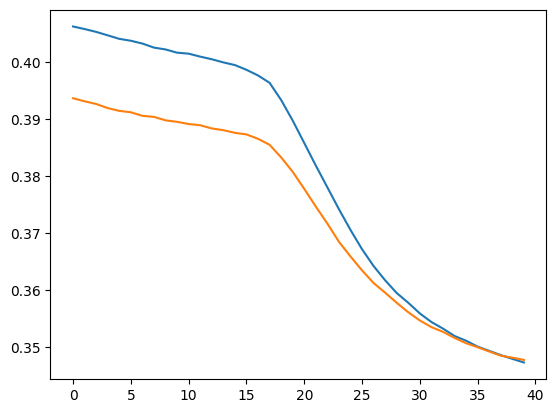

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

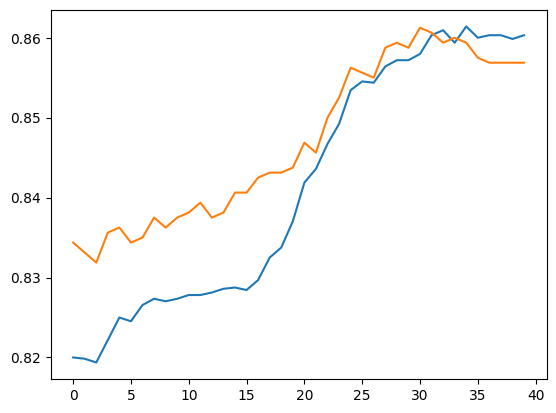

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])